# 需要と供給

In [198]:
# demagr demind demdom rivout
# km3/year = 1/1e9 m3/year
losangels = [0.0485810622, 0.8715339358875, 0.39249716332499995, 0.08188481025]
tokyo = [0.662622462093164, 0.41733574063593754, 0.6893963773874999, 7.8490622592]
london = [0.0, 0.08686613120625, 0.12848697495, 1.9696117248]
paris = [0.11320041283330078, 0.354672001771875, 0.1421916840140625, 8.5725547776]

summary = [paris, london, tokyo, losangels]
name = ['paris', 'london', 'tokyo', 'losangels']

In [199]:
import numpy as np
import matplotlib.pyplot as plt

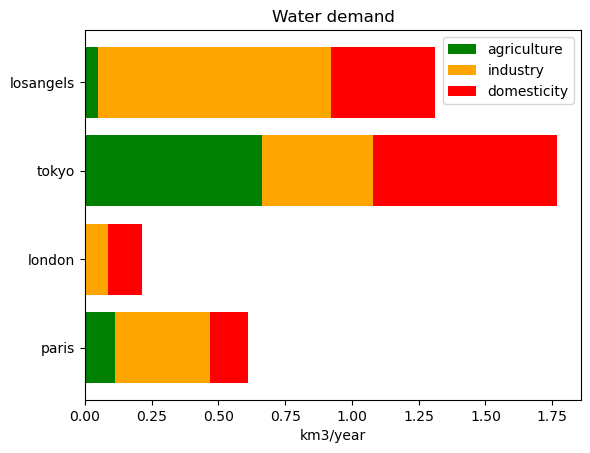

In [200]:
agr = np.array([country[0] for country in summary])
ind = np.array([country[1] for country in summary])
dom = np.array([country[2] for country in summary])

plt.barh(name, agr, label='agriculture', color='green')
plt.barh(name, ind, left=agr, label='industry', color='orange')
plt.barh(name, dom, left=agr+ind, label='domesticity', color='red')

plt.title('Water demand')
plt.xlabel('km3/year')

plt.legend()

Text(0.5, 1.0, 'River supplay')

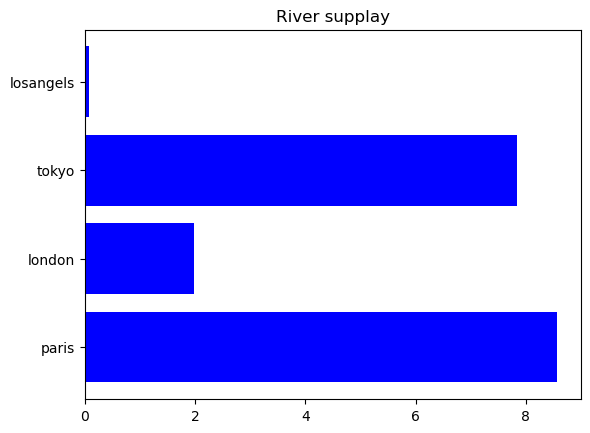

In [201]:
rivout = np.array([country[3] for country in summary])

plt.barh(name, rivout, color='blue')
plt.title('River supplay')

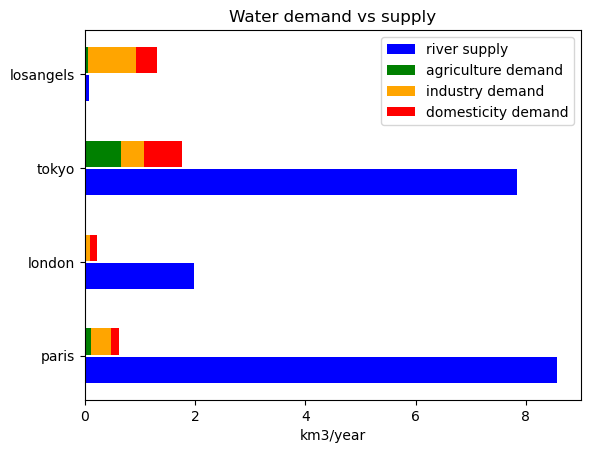

In [202]:
fig, ax = plt.subplots()

x = np.arange(len(name))
y = np.arange(4)
gap = 0.15
width=0.28

ax.barh(x-gap, rivout, width, label='river supply', color='blue')

ax.barh(x+gap, agr, width, label='agriculture demand', color='green')
ax.barh(x+gap, ind, width, left=agr, label='industry demand', color='orange')
ax.barh(x+gap, dom, width, left=agr+ind, label='domesticity demand', color='red')

ax.set_title('Water demand vs supply')
ax.set_xlabel('km3/year')
ax.set_yticks(y)
ax.set_yticklabels(name)
         

ax.legend()

# 都市マスクカバー率

In [203]:
file_path = '/home/kajiyama/H08/H08_20230612/map/dat/result_citymask.txt'
data = []
with open(file_path, 'r') as file:
    for line in file:
        row = line.strip().split('|')
        data.append(row)
        
index_list = [int(i[0]) for i in data]
name_list = [i[1] for i in data]
gwp_list = [float(i[2]) for i in data]
un_list = [float(i[3]) for i in data]
coverage_list = [float(i[4]) for i in data]
grid_list = [float(i[5]) for i in data]

[76, 303, 653, 457, 672, 586, 121, 743, 104, 765, 331, 387, 645, 679, 783, 404, 573, 599, 644, 150, 130, 629, 221, 205, 769, 563, 823, 51, 496, 667, 587, 285, 549, 855, 714, 820, 762, 848, 531, 352]


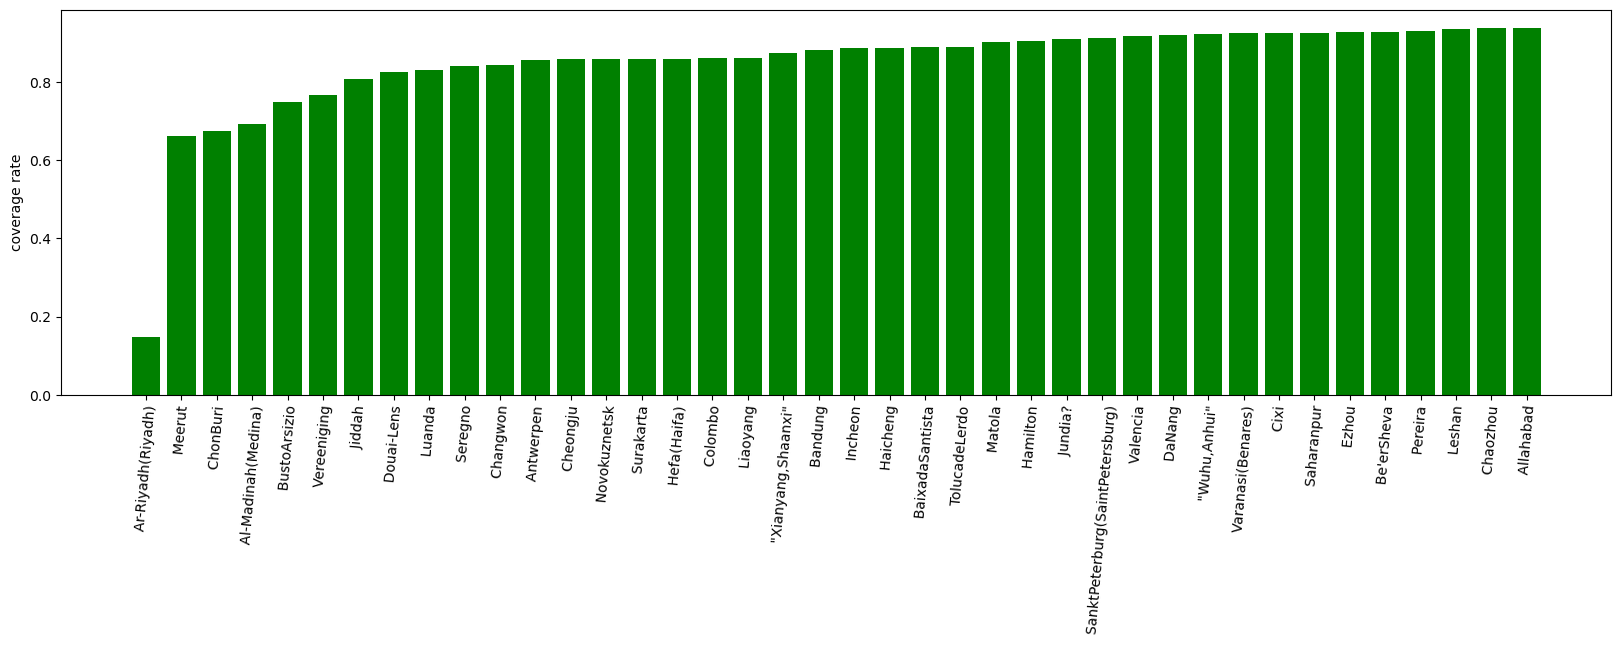

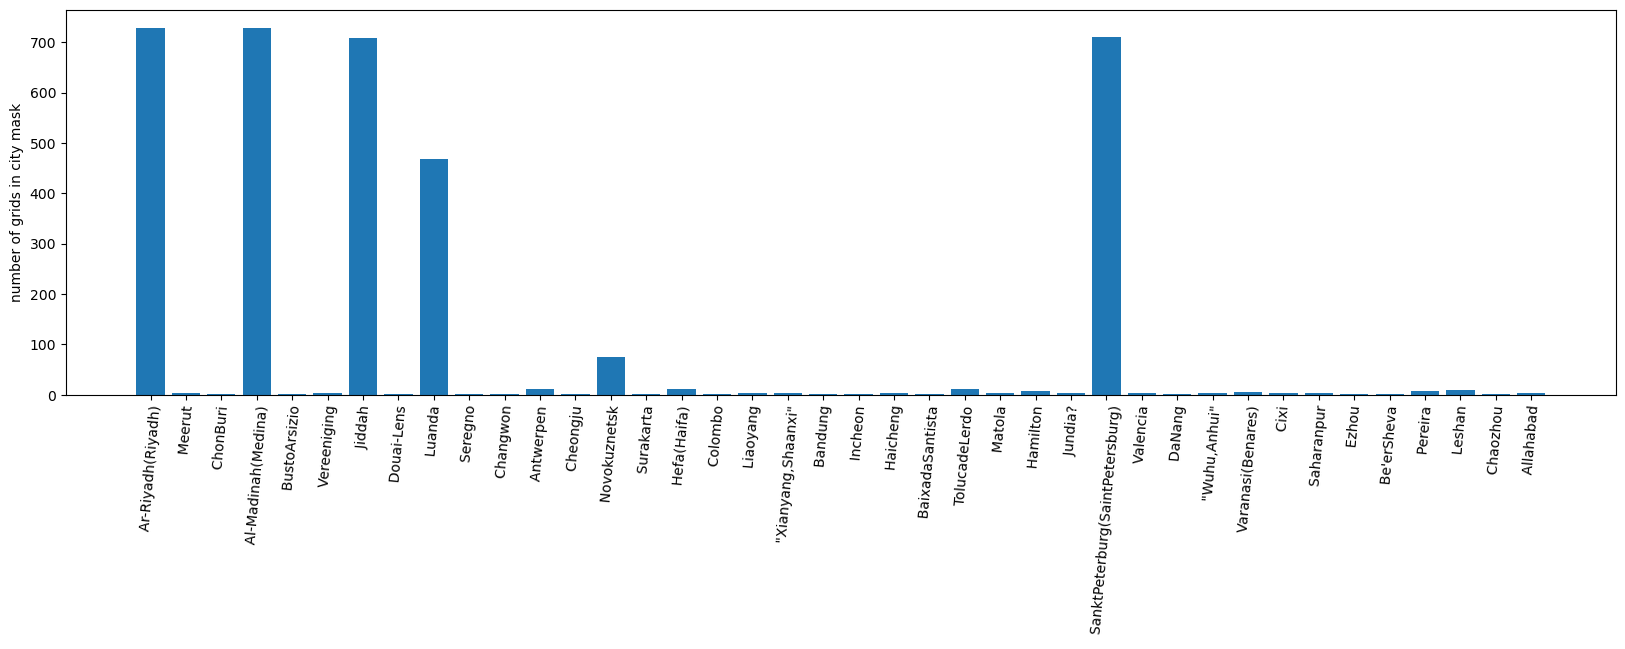

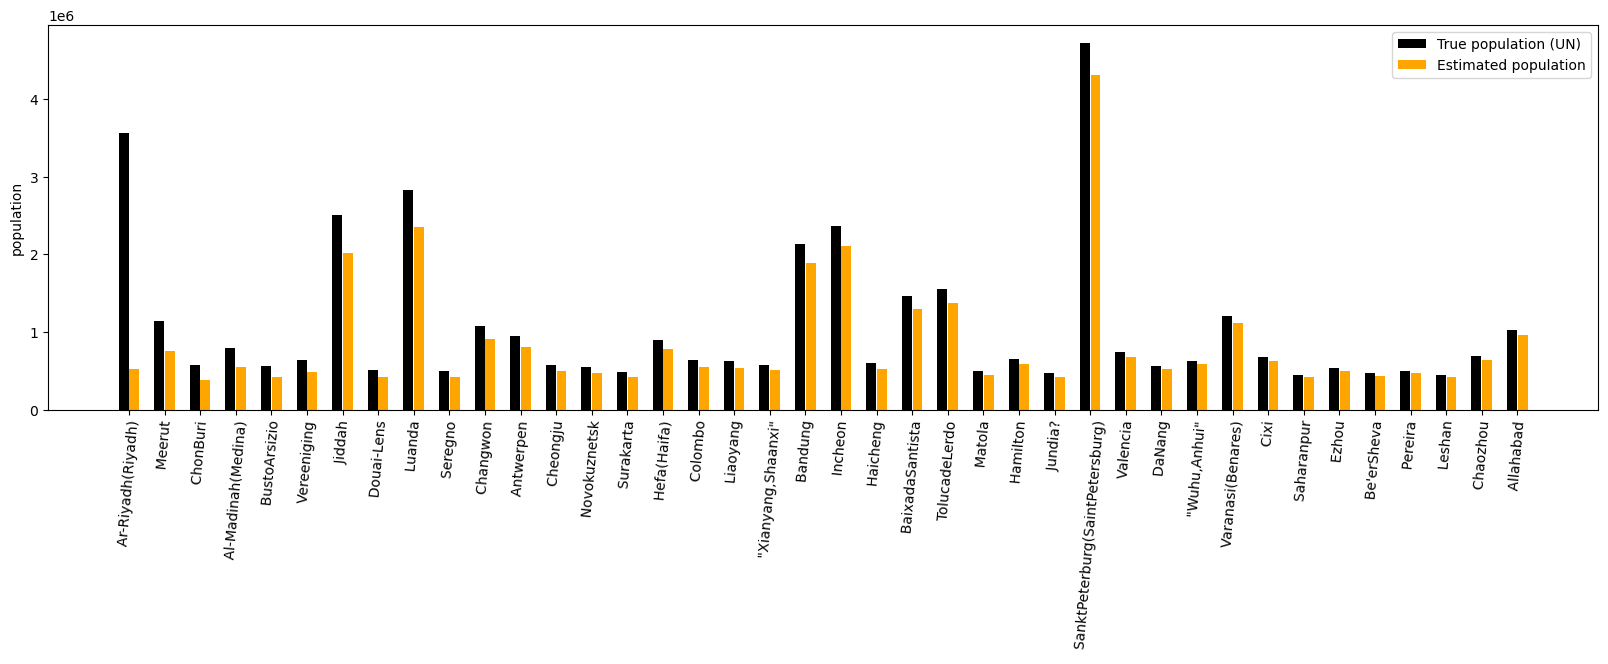

In [204]:
file_path = '/home/kajiyama/H08/H08_20230612/map/dat/result_citymask.txt'
data = []
with open(file_path, 'r') as file:
    for line in file:
        row = line.strip().split('|')
        data.append(row)
        
index_list = [int(i[0]) for i in data]
name_list = [i[1] for i in data]
gwp_list = [float(i[2]) for i in data]
un_list = [float(i[3]) for i in data]
coverage_list = [float(i[4]) for i in data]
grid_list = [float(i[5]) for i in data]

# change both lines
coverage_sorted = sorted(coverage_list)
sorted_indices = sorted(range(len(coverage_list)), key=lambda k: coverage_list[k])

index_sorted = [index_list[i] for i in sorted_indices]
name_sorted = [name_list[i] for i in sorted_indices]
gwp_sorted = [gwp_list[i] for i in sorted_indices]
un_sorted = [un_list[i] for i in sorted_indices]
grid_sorted = [grid_list[i] for i in sorted_indices]

start = 0
end = 40
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(name_sorted[start:end], coverage_sorted[start:end], color='green')
ax.set_xticks(name_sorted[start:end])
ax.set_xticklabels(name_sorted[start:end], fontsize=10, rotation=85)
ax.set_ylabel('coverage rate')

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(name_sorted[start:end], grid_sorted[start:end])
ax.set_xticks(name_sorted[start:end])
ax.set_xticklabels(name_sorted[start:end], fontsize=10, rotation=85)
ax.set_ylabel('number of grids in city mask')

fig, ax = plt.subplots(figsize=(20, 5))
x = np.arange(end)
gap = 0.15
width=0.28
ax.bar(x-gap, un_sorted[start:end], width, label='True population (UN)', color='black')
ax.bar(x+gap, gwp_sorted[start:end], width, label='Estimated population', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(name_sorted[start:end], fontsize=10, rotation=85)
ax.set_ylabel('population')
ax.legend()

print(index_sorted[start:end])

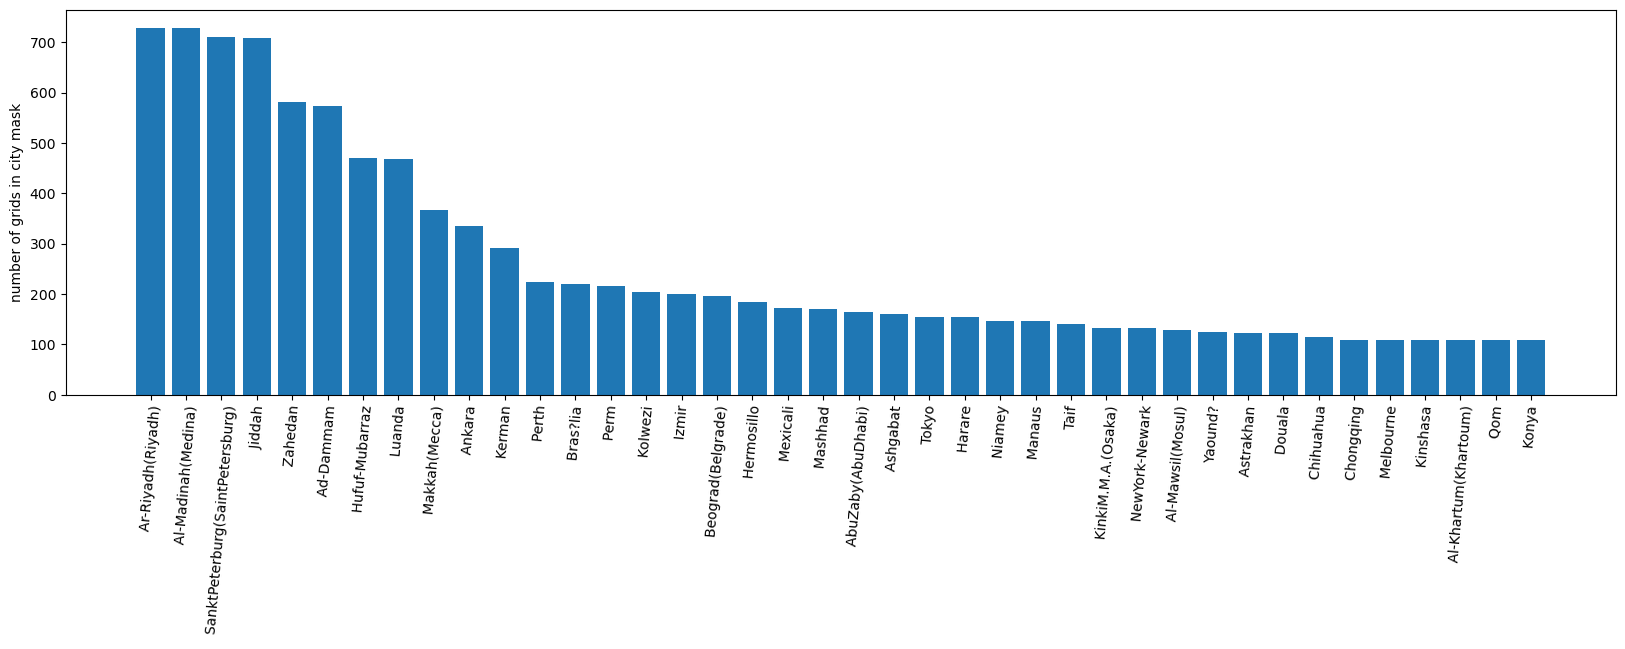

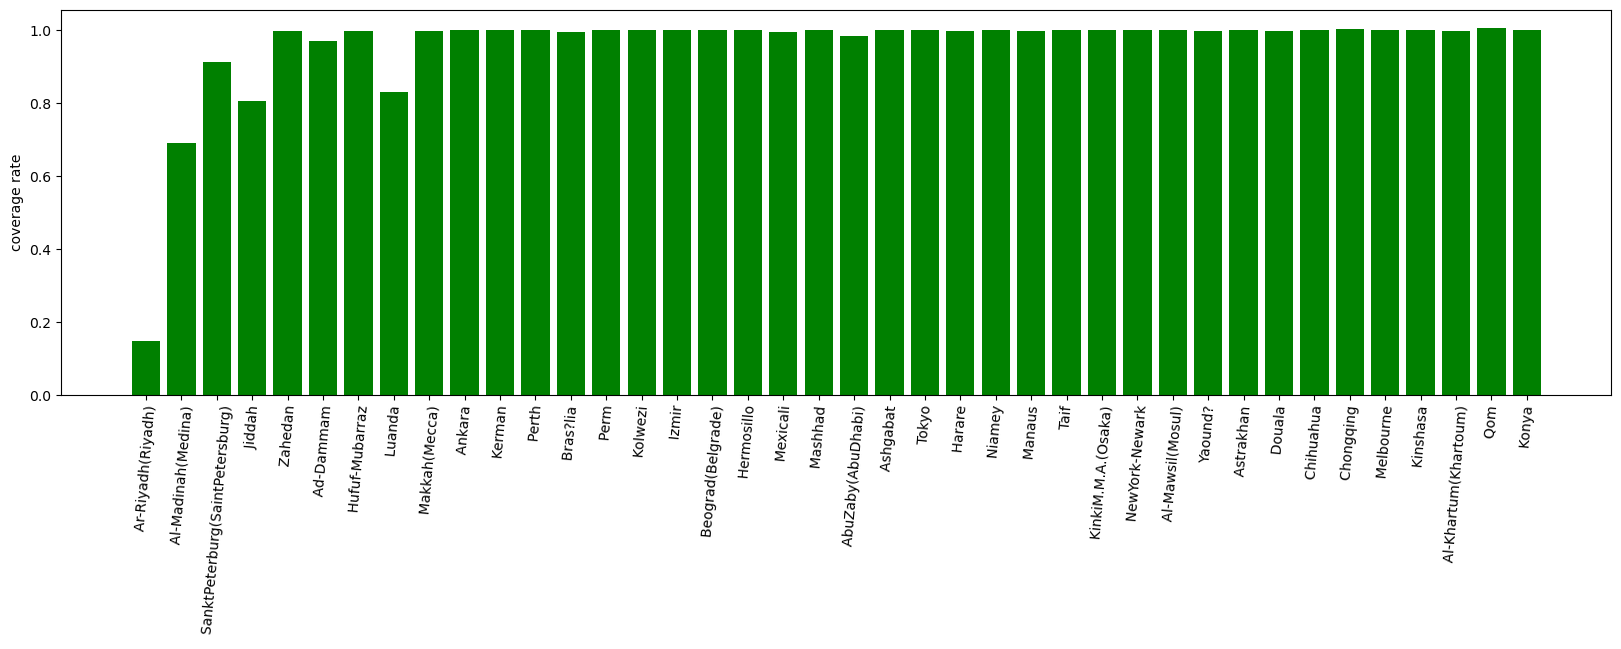

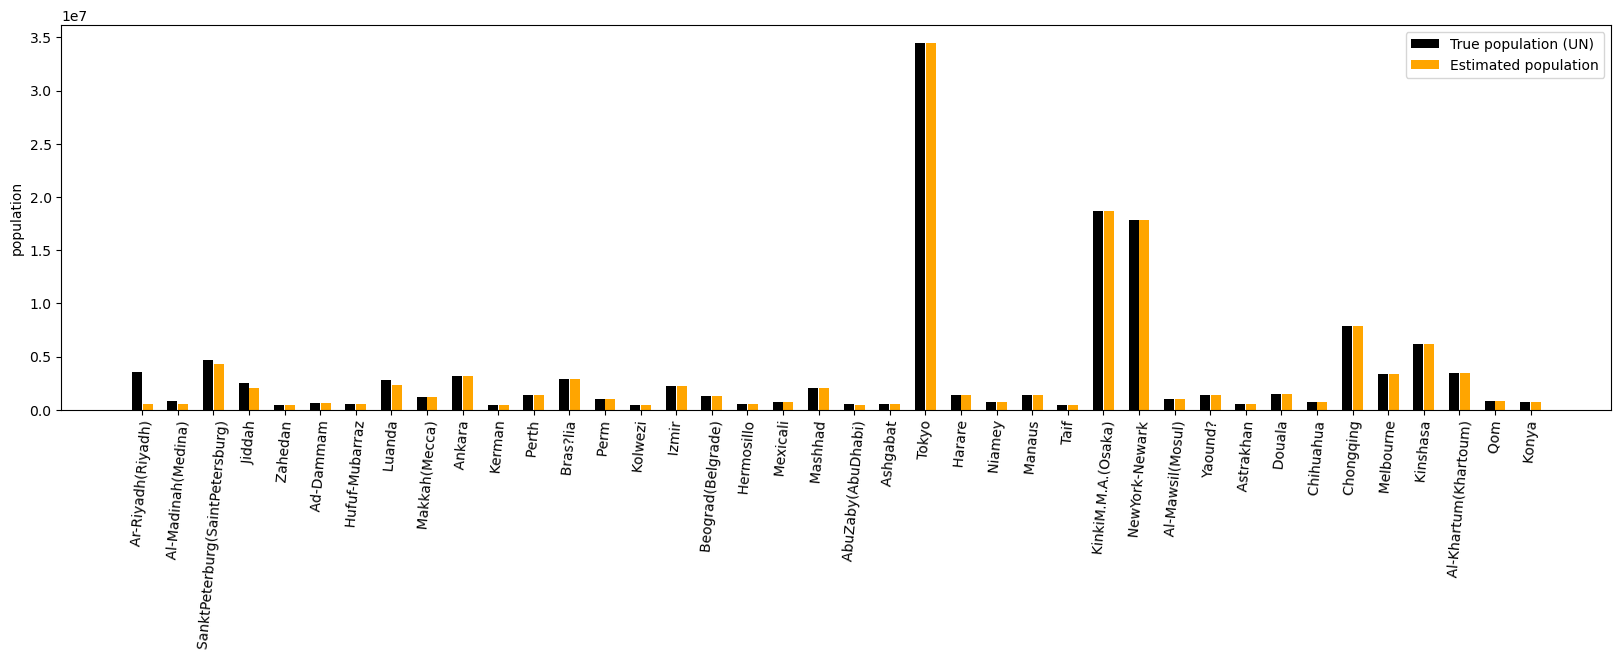

In [205]:
file_path = '/home/kajiyama/H08/H08_20230612/map/dat/result_citymask.txt'
data = []
with open(file_path, 'r') as file:
    for line in file:
        row = line.strip().split('|')
        data.append(row)
        
index_list = [int(i[0]) for i in data]
name_list = [i[1] for i in data]
gwp_list = [float(i[2]) for i in data]
un_list = [float(i[3]) for i in data]
coverage_list = [float(i[4]) for i in data]
grid_list = [float(i[5]) for i in data]

grid_sorted = sorted(grid_list, reverse=True)
sorted_indices = sorted(range(len(grid_list)), key=lambda k: grid_list[k], reverse=True)

index_sorted = [index_list[i] for i in sorted_indices]
name_sorted = [name_list[i] for i in sorted_indices]
gwp_sorted = [gwp_list[i] for i in sorted_indices]
un_sorted = [un_list[i] for i in sorted_indices]
coverage_sorted = [coverage_list[i] for i in sorted_indices]

start = 0
end = 40

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(name_sorted[start:end], grid_sorted[start:end])
ax.set_xticks(name_sorted[start:end])
ax.set_xticklabels(name_sorted[start:end], fontsize=10, rotation=85)
ax.set_ylabel('number of grids in city mask')

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(name_sorted[start:end], coverage_sorted[start:end], color='green')
ax.set_xticks(name_sorted[start:end])
ax.set_xticklabels(name_sorted[start:end], fontsize=10, rotation=85)
ax.set_ylabel('coverage rate')

fig, ax = plt.subplots(figsize=(20, 5))
x = np.arange(end)
gap = 0.15
width=0.28
ax.bar(x-gap, un_sorted[start:end], width, label='True population (UN)', color='black')
ax.bar(x+gap, gwp_sorted[start:end], width, label='Estimated population', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(name_sorted[start:end], fontsize=10, rotation=85)
ax.set_ylabel('population')
ax.legend()